In [44]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
import time
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier


In [27]:
cancer=load_breast_cancer()
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
df["target"]=cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [24]:
x=df
y=cancer.target

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [36]:
r=5
model=SVC()
model.fit(x_train_scaled,y_train)
start=time.time()
y_pred=model.predict(x_test_scaled)
end=time.time()
print("Time taken:",end-start)
print("Accuracy Score:",round(accuracy_score(y_test,y_pred),r))
print("Precision Score:",round(precision_score(y_test,y_pred),r))
print("Recall Score:",round(recall_score(y_test,y_pred),r))
print("F1 Score:",round(f1_score(y_test,y_pred),r))

Time taken: 0.005922079086303711
Accuracy Score: 0.97368
Precision Score: 1.0
Recall Score: 0.96
F1 Score: 0.97959


In [42]:
  poly = PolynomialFeatures(degree=2)
  x_train_poly = poly.fit_transform(x_train)
  x_test_poly = poly.transform(x_test)
  model = SVC(kernel='poly')
  model.fit(x_train_poly, y_train)
  start=time.time()
  y_pred = model.predict(x_test_poly)
  end=time.time()
  print("Time taken:",end-start)
  print("Accuracy Score:",round(accuracy_score(y_test,y_pred),r))
  print("Precision Score:",round(precision_score(y_test,y_pred),r))
  print("Recall Score:",round(recall_score(y_test,y_pred),r))
  print("F1 Score:",round(f1_score(y_test,y_pred),r))

Time taken: 0.0025005340576171875
Accuracy Score: 0.86842
Precision Score: 0.84091
Recall Score: 0.98667
F1 Score: 0.90798


In [43]:
  sigmoid = PolynomialFeatures(degree=2)
  x_train_sigmoid = sigmoid.fit_transform(x_train)
  x_test_sigmoid = sigmoid.transform(x_test)
  model = SVC(kernel='sigmoid')
  model.fit(x_train_sigmoid, y_train)
  start=time.time()
  y_pred = model.predict(x_test_sigmoid)
  end=time.time()
  print("Time taken:",end-start)
  print("Accuracy Score:",round(accuracy_score(y_test,y_pred),r))
  print("Precision Score:",round(precision_score(y_test,y_pred),r))
  print("Recall Score:",round(recall_score(y_test,y_pred),r))
  print("F1 Score:",round(f1_score(y_test,y_pred),r))

Time taken: 0.0047795772552490234
Accuracy Score: 0.85965
Precision Score: 0.89333
Recall Score: 0.89333
F1 Score: 0.89333


In [72]:
k_range = range(1, 21)
accuracy_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train_scaled, y_train)
  y_pred = knn.predict(x_test_scaled)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)
best_k = k_range[np.argmax(accuracy_scores)]
print("Best K:", best_k)

# Train the model with the best K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train_scaled, y_train)

Best K: 3


KNeighborsClassifier(n_neighbors=3)

Text(0, 0.5, 'Testing Accuracy')

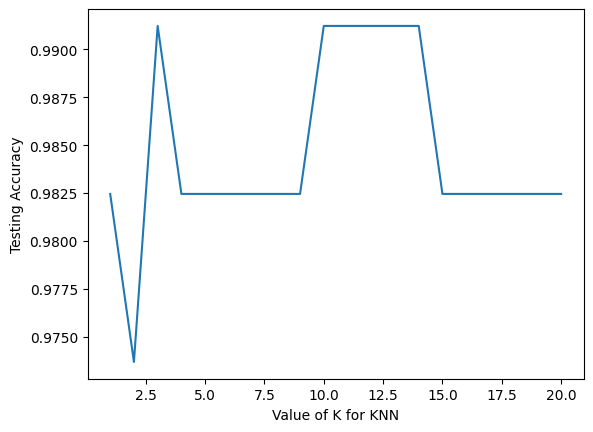

In [73]:
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
